## 1. 환경 설정 및 임포트

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import asyncio
import logging
from pathlib import Path
from dotenv import load_dotenv
from helper_dev_utils import get_auto_logger
logger = get_auto_logger()
import sys
from pathlib import Path

# 프로젝트 루트 경로 추가
project_root = Path.cwd().parent.parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

logger.debug(f"프로젝트 루트: {project_root}")

# 환경 변수 로드
env_path = project_root / ".env"
if env_path.exists():
    load_dotenv(env_path)
    logger.debug(f"환경 변수 로드: {env_path}")
else:
    logger.warning(f".env 파일을 찾을 수 없습니다 ({env_path})")


2026-01-07 20:58:01 W [helper_utils_colab:211] - GoogleDrive not found, falling back to temp folder: /tmp
2026-01-07 20:58:01 W [helper_utils_colab:122] - Cache directory not found, falling back to temp folder: /tmp
2026-01-07 20:58:01 D [ipykernel_launcher:17] - 프로젝트 루트: /home/spai0433/codeit-ai-3team-ad-content
2026-01-07 20:58:01 D [ipykernel_launcher:23] - 환경 변수 로드: /home/spai0433/codeit-ai-3team-ad-content/.env
2026-01-07 20:58:01 W [helper_utils_colab:122] - Cache directory not found, falling back to temp folder: /tmp
2026-01-07 20:58:01 D [ipykernel_launcher:17] - 프로젝트 루트: /home/spai0433/codeit-ai-3team-ad-content
2026-01-07 20:58:01 D [ipykernel_launcher:23] - 환경 변수 로드: /home/spai0433/codeit-ai-3team-ad-content/.env


## 2. OpenAI API 키 확인

In [3]:
# OpenAI API 키 확인
openai_api_key = os.getenv("OPENAI_API_KEY")

if not openai_api_key:
    logger.debug("❌ OPENAI_API_KEY 환경 변수가 설정되지 않았습니다.")
    logger.debug("   .env 파일에 다음을 추가하세요:")
    logger.debug("   OPENAI_API_KEY=sk-...")
else:
    logger.debug(f"OpenAI API 키 확인됨 (길이: {len(openai_api_key)} 문자)")
    logger.debug(f"   키 prefix: {openai_api_key[:5]} --- {openai_api_key[-5:]}")

2026-01-07 20:58:01 D [ipykernel_launcher:9] - OpenAI API 키 확인됨 (길이: 164 문자)
2026-01-07 20:58:01 D [ipykernel_launcher:10] -    키 prefix: sk-pr --- cxzEA
2026-01-07 20:58:01 D [ipykernel_launcher:10] -    키 prefix: sk-pr --- cxzEA


## 3. LLM-MCP 어댑터 임포트

In [4]:
from src.nanoCocoa_mcpserver import server
from src.nanoCocoa_mcpserver.client.llm_adapter import LLMMCPAdapter

logger.debug("LLMMCPAdapter 임포트 성공")

2026-01-07 20:58:10 D [ipykernel_launcher:4] - LLMMCPAdapter 임포트 성공


In [5]:
# MCP 서버 연결 테스트
async def test_mcp_connection():
    """MCP 서버 연결 및 도구 목록 조회 테스트"""
    logger.debug("=" * 60)
    logger.debug("MCP 서버 연결 테스트")
    logger.debug("=" * 60)
    
    adapter = LLMMCPAdapter(
        openai_api_key=openai_api_key,
        model="gpt-5-mini",
        temperature=0.7,
    )
    
    try:
        # MCP 서버 연결
        await adapter.connect_mcp()
        logger.debug("MCP 서버 연결 성공")
        
        # 사용 가능한 도구 목록 조회
        tools = await adapter.get_available_tools()
        logger.debug(f"\n사용 가능한 도구 수: {len(tools)}개\n")
        
        for i, tool in enumerate(tools, 1):
            func = tool["function"]
            logger.debug(f"{i}. {func['name']}")
            logger.debug(f"   설명: {func['description'][:80]}...")
        
        return adapter, tools
        
    except Exception as e:
        logger.debug(f"❌ 오류 발생: {e}")
        await adapter.disconnect_mcp()
        raise

# 실행
adapter, tools = await test_mcp_connection()

2026-01-07 20:58:10 D [ipykernel_launcher:4] - ============================================================
2026-01-07 20:58:10 D [ipykernel_launcher:5] - MCP 서버 연결 테스트
2026-01-07 20:58:10 D [ipykernel_launcher:6] - ============================================================
2026-01-07 20:58:10 D [ipykernel_launcher:5] - MCP 서버 연결 테스트
2026-01-07 20:58:10 D [ipykernel_launcher:6] - ============================================================


2026-01-07 11:58:13,809 [INFO] MCP 서버 파이썬 경로: /home/spai0433/miniconda3/envs/py311_ad/bin/python
2026-01-07 11:58:13,810 [INFO] MCP 서버 연결 중: /home/spai0433/miniconda3/envs/py311_ad/bin/python -m src.nanoCocoa_mcpserver.server
2026-01-07 11:58:13,810 [INFO] MCP 서버 연결 중: /home/spai0433/miniconda3/envs/py311_ad/bin/python -m src.nanoCocoa_mcpserver.server
2026-01-07 11:58:16,616 [INFO] MCP 서버 연결 완료
2026-01-07 11:58:16,616 [INFO] MCP 서버 연결 완료


2026-01-07 20:58:16 D [ipykernel_launcher:17] - MCP 서버 연결 성공


2026-01-07 11:58:16,623 [INFO] 사용 가능한 MCP 도구 8개 로드됨


2026-01-07 20:58:16 D [ipykernel_launcher:21] - 
사용 가능한 도구 수: 8개

2026-01-07 20:58:16 D [ipykernel_launcher:25] - 1. generate_ad_image
2026-01-07 20:58:16 D [ipykernel_launcher:26] -    설명: 
    제품 이미지를 기반으로 AI가 전문적인 광고 이미지를 생성합니다.

    이 도구는 3단계 파이프라인을 자동으로 실행합니다:
    ...
2026-01-07 20:58:16 D [ipykernel_launcher:25] - 2. check_generation_status
2026-01-07 20:58:16 D [ipykernel_launcher:26] -    설명: 
    비동기로 시작된 광고 생성 작업의 현재 진행 상태를 확인합니다.

    사용 시나리오:
    - generate_ad_image를 ...
2026-01-07 20:58:16 D [ipykernel_launcher:25] - 3. stop_generation
2026-01-07 20:58:16 D [ipykernel_launcher:26] -    설명: 
    현재 실행 중이거나 대기 중인 광고 생성 작업을 강제로 중단합니다.

    사용 시나리오:
    - 잘못된 파라미터로 실행한 작업을...
2026-01-07 20:58:16 D [ipykernel_launcher:25] - 1. generate_ad_image
2026-01-07 20:58:16 D [ipykernel_launcher:26] -    설명: 
    제품 이미지를 기반으로 AI가 전문적인 광고 이미지를 생성합니다.

    이 도구는 3단계 파이프라인을 자동으로 실행합니다:
    ...
2026-01-07 20:58:16 D [ipykernel_launcher:25] - 2. check_generation_status
2026-01-07 20:58:16 D [

## 3단계 광고 생성 워크플로우 (job_id 기반)

광고 생성을 3개의 독립적인 셀로 분리:
- **셀 1**: 광고 생성 요청 → job_id 받기
- **셀 2**: job_id로 상태 검사 (10초 간격 polling)
- **셀 3**: job_id로 완료된 이미지 가져와서 표시

In [6]:
# 셀 1: 광고 생성 요청 (job_id 받기)
async def request_ad_generation():
    """
    광고 이미지 생성을 요청하고 job_id를 받아옵니다.
    
    Returns:
        job_id (str): 생성 작업 ID
    """
    logger.debug("=" * 60)
    logger.debug("1단계: 광고 생성 요청")
    logger.debug("=" * 60)
    
    # 제품 이미지 경로
    product_image_path = Path.cwd() / "image.png"
    
    if not product_image_path.exists():
        logger.debug(f"❌ 제품 이미지를 찾을 수 없습니다: {product_image_path}")
        return None
    
    logger.debug(f"제품 이미지: {product_image_path}")
    logger.debug("\n제품 정보:")
    logger.debug("  - 제품명: 말린 노가리")
    logger.debug("  - 판매 장소: 시장 자판")
    logger.debug("  - 세일 가격: 2500원\n")
    
    # 저장 경로 설정
    output_path = Path.cwd() / "nogari_ad_3step.png"
    
    # MCP 연결 확인
    if 'adapter' not in globals() or adapter is None:
        logger.debug("❌ adapter가 없습니다. 셀 9번을 먼저 실행하세요.")
        return None
    
    if adapter._mcp_session is None:
        logger.debug("⚠️  MCP 재연결 중...\n")
        await adapter.connect_mcp()
        logger.debug("MCP 재연결 완료\n")
    
    try:
        # LLM에게 광고 생성 요청 (job_id만 받기)
        user_message = f"""
        말린 노가리 제품의 시장 판매용 광고 이미지 생성을 시작해주세요.
        
        제품 정보:
        - 제품명: 말린 노가리
        - 판매 장소: 시장 자판
        - 세일 가격: 2500원
        - 제품 이미지 경로: {product_image_path}
        
        요구사항:
        1. 배경: 시장 분위기 (전통시장, 노점상 느낌)
        2. 텍스트: "특가 2500원"
        3. 텍스트 스타일: 굵고 선명한 한글 텍스트
        4. 폰트: 사용 가능한 한글 폰트 중 선택
        
        중요: generate_ad_image 도구 호출 시:
        - product_image_path: "{product_image_path}"
        - wait_for_completion: False (즉시 job_id 반환)
        - test_mode: False
        - save_output_path: "{output_path}"
        
        생성을 시작하고 job_id만 알려주세요. 완료를 기다리지 마세요.
        """
        
        logger.debug("광고 생성 요청 중...\n")
        
        # 광고 생성 요청 (job_id만 받기)
        response = await adapter.chat(
            user_message=user_message,
            max_iterations=10
        )
        
        logger.debug(f"LLM 응답:\n{response}\n")
        
        # job_id 추출
        import re
        job_id_match = re.search(r'job[-_]?id[:\s]+([a-zA-Z0-9\-_]+)', response, re.IGNORECASE)
        
        if not job_id_match:
            logger.debug("❌ job_id를 찾을 수 없습니다.")
            return None
        
        job_id = job_id_match.group(1)
        logger.debug("=" * 60)
        logger.debug(f"광고 생성 작업 시작: {job_id}")
        logger.debug("=" * 60)
        logger.debug("\n다음 셀에서 이 job_id로 상태를 확인하세요.")
        
        return job_id
        
    except Exception as e:
        logger.debug(f"\n❌ 오류: {e}")
        import traceback
        logger.debug(traceback.format_exc())
        return None

# 실행하고 job_id를 변수에 저장
job_id = await request_ad_generation()

2026-01-07 20:58:16 D [ipykernel_launcher:9] - ============================================================
2026-01-07 20:58:16 D [ipykernel_launcher:10] - 1단계: 광고 생성 요청
2026-01-07 20:58:16 D [ipykernel_launcher:11] - ============================================================
2026-01-07 20:58:16 D [ipykernel_launcher:20] - 제품 이미지: /home/spai0433/codeit-ai-3team-ad-content/script/김명환/image.png
2026-01-07 20:58:16 D [ipykernel_launcher:21] - 
제품 정보:
2026-01-07 20:58:16 D [ipykernel_launcher:22] -   - 제품명: 말린 노가리
2026-01-07 20:58:16 D [ipykernel_launcher:23] -   - 판매 장소: 시장 자판
2026-01-07 20:58:16 D [ipykernel_launcher:24] -   - 세일 가격: 2500원

2026-01-07 20:58:16 D [ipykernel_launcher:65] - 광고 생성 요청 중...

2026-01-07 20:58:16 D [ipykernel_launcher:10] - 1단계: 광고 생성 요청
2026-01-07 20:58:16 D [ipykernel_launcher:11] - ============================================================
2026-01-07 20:58:16 D [ipykernel_launcher:20] - 제품 이미지: /home/spai0433/codeit-ai-3team-ad-content/script/김명환/image.pn

2026-01-07 11:58:16,680 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 11:58:16,680 [INFO] 대화 반복 1/10
2026-01-07 11:58:16,680 [INFO] 대화 반복 1/10
2026-01-07 11:58:20,126 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:58:20,138 [INFO] 도구 호출 요청: list_available_fonts
2026-01-07 11:58:20,126 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:58:20,138 [INFO] 도구 호출 요청: list_available_fonts
2026-01-07 11:58:20,139 [INFO] MCP 도구 호출: list_available_fonts
2026-01-07 11:58:20,139 [INFO] MCP 도구 호출: list_available_fonts
2026-01-07 11:58:20,234 [INFO] MCP 도구 실행 완료: list_available_fonts
2026-01-07 11:58:20,235 [INFO] 대화 반복 2/10
2026-01-07 11:58:20,234 [INFO] MCP 도구 실행 완료: list_available_fonts
2026-01-07 11:58:20,235 [INFO] 대화 반복 2/10
2026-01-07 11:58:34,650 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:58:34,653 [INFO] 도구 호출 요청: generate_ad_image
2026-0

2026-01-07 20:58:49 D [ipykernel_launcher:73] - LLM 응답:
작업이 시작되었습니다. job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee

2026-01-07 20:58:49 D [ipykernel_launcher:84] - ============================================================
2026-01-07 20:58:49 D [ipykernel_launcher:85] - 광고 생성 작업 시작: 2fe58cba-82f5-4e63-85ca-ad6b169872ee
2026-01-07 20:58:49 D [ipykernel_launcher:86] - ============================================================
2026-01-07 20:58:49 D [ipykernel_launcher:87] - 
다음 셀에서 이 job_id로 상태를 확인하세요.
2026-01-07 20:58:49 D [ipykernel_launcher:84] - ============================================================
2026-01-07 20:58:49 D [ipykernel_launcher:85] - 광고 생성 작업 시작: 2fe58cba-82f5-4e63-85ca-ad6b169872ee
2026-01-07 20:58:49 D [ipykernel_launcher:86] - ============================================================
2026-01-07 20:58:49 D [ipykernel_launcher:87] - 
다음 셀에서 이 job_id로 상태를 확인하세요.


In [7]:
# 셀 2: job_id로 생성 상태 검사 (10초 간격 polling)
async def check_ad_status(job_id: str):
    """
    job_id를 사용하여 광고 생성 상태를 주기적으로 확인합니다.
    
    Args:
        job_id: 광고 생성 작업 ID
        
    Returns:
        bool: 완료 여부 (True: 완료, False: 실패 또는 타임아웃)
    """
    if not job_id:
        logger.debug("❌ job_id가 없습니다. 먼저 이전 셀을 실행하세요.")
        return False
    
    logger.debug("=" * 60)
    logger.debug(f"2단계: 생성 상태 검사 (job_id: {job_id})")
    logger.debug("=" * 60)
    
    # MCP 연결 확인
    if 'adapter' not in globals() or adapter is None:
        logger.debug("❌ adapter가 없습니다. 셀 9번을 먼저 실행하세요.")
        return False
    
    if adapter._mcp_session is None:
        logger.debug("⚠️  MCP 재연결 중...\n")
        await adapter.connect_mcp()
        logger.debug("MCP 재연결 완료\n")
    
    try:
        check_count = 0
        max_checks = 180  # 30분 = 180회 (10초 x 180)
        
        logger.debug("광고 생성 중... (10초 간격으로 상태 확인)\n")
        
        while check_count < max_checks:
            check_count += 1
            
            # LLM에게 상태 확인 요청
            status_message = f"""
            다음 job_id의 광고 생성 상태를 확인해주세요:
            job_id: {job_id}
            
            check_generation_status 도구를 사용하여:
            1. 현재 상태 (status)
            2. 진행률 (progress_percent)
            3. 현재 단계 (current_step)
            를 확인하고 간단히 보고해주세요.
            """
            
            status_response = await adapter.chat(
                user_message=status_message,
                max_iterations=3
            )
            
            # 완료 확인: status가 "completed"이고 progress가 100%일 때만
            response_lower = status_response.lower()
            is_status_completed = (
                '"status": "completed"' in response_lower or 
                "'status': 'completed'" in response_lower or
                "status: completed" in response_lower
            )
            is_progress_100 = (
                "progress_percent: 100" in status_response or
                "progress_percent\": 100" in status_response or
                "100%" in status_response
            )
            
            if is_status_completed and is_progress_100:
                logger.debug("\n" + "=" * 60)
                logger.debug("광고 생성 완료!")
                logger.debug("=" * 60)
                logger.debug(f"\n{status_response}\n")
                logger.debug("다음 셀에서 생성된 이미지를 확인하세요.")
                return True
            
            # 실패 확인
            elif "failed" in response_lower or "실패" in status_response or "오류" in status_response:
                logger.debug("\n" + "=" * 60)
                logger.debug("❌ 광고 생성 실패")
                logger.debug("=" * 60)
                logger.debug(f"\n{status_response}")
                return False
            
            # 진행 중
            else:
                logger.debug(f"[{check_count}회 체크] {status_response[:80]}...")
                await asyncio.sleep(10)  # 10초 대기
        
        # 타임아웃
        logger.debug("\n⚠️ 최대 대기 시간(30분)을 초과했습니다.")
        return False
        
    except Exception as e:
        logger.debug(f"\n❌ 오류: {e}")
        import traceback
        logger.debug(traceback.format_exc())
        return False

# 실행 (이전 셀의 job_id 사용)
if 'job_id' in globals() and job_id:
    is_completed = await check_ad_status(job_id)
else:
    logger.debug("❌ job_id가 없습니다. 먼저 이전 셀을 실행하세요.")

2026-01-07 20:58:49 D [ipykernel_launcher:16] - ============================================================
2026-01-07 20:58:49 D [ipykernel_launcher:17] - 2단계: 생성 상태 검사 (job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee)
2026-01-07 20:58:49 D [ipykernel_launcher:18] - ============================================================
2026-01-07 20:58:49 D [ipykernel_launcher:34] - 광고 생성 중... (10초 간격으로 상태 확인)

2026-01-07 20:58:49 D [ipykernel_launcher:17] - 2단계: 생성 상태 검사 (job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee)
2026-01-07 20:58:49 D [ipykernel_launcher:18] - ============================================================
2026-01-07 20:58:49 D [ipykernel_launcher:34] - 광고 생성 중... (10초 간격으로 상태 확인)



2026-01-07 11:58:49,736 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 11:58:49,736 [INFO] 대화 반복 1/3
2026-01-07 11:58:49,736 [INFO] 대화 반복 1/3
2026-01-07 11:58:53,258 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:58:53,260 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 11:58:53,261 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 11:58:53,258 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:58:53,260 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 11:58:53,261 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 11:58:53,300 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 11:58:53,301 [INFO] 대화 반복 2/3
2026-01-07 11:58:53,300 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 11:58:53,301 [INFO] 대화 반복 2/3
2026-01-07 11:58:55,519 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:58:55,521 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 20:58:55 D [ipykernel_launcher:87] - [1회 체크] 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 진행 상태는 다음과 같습니다:

- 현재 상태 (sta...


2026-01-07 11:59:05,537 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 11:59:05,538 [INFO] 대화 반복 1/3
2026-01-07 11:59:05,538 [INFO] 대화 반복 1/3
2026-01-07 11:59:08,812 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:59:08,815 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 11:59:08,816 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 11:59:08,812 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:59:08,815 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 11:59:08,816 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 11:59:08,853 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 11:59:08,854 [INFO] 대화 반복 2/3
2026-01-07 11:59:08,853 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 11:59:08,854 [INFO] 대화 반복 2/3
2026-01-07 11:59:10,592 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:59:10,595 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 20:59:10 D [ipykernel_launcher:87] - [2회 체크] 요청하신 작업의 현재 상태입니다:

- 상태 (status): running
- 진행률 (progress_percent): 0%
- 현재 단계 ...


2026-01-07 11:59:20,614 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 11:59:20,617 [INFO] 대화 반복 1/3
2026-01-07 11:59:20,617 [INFO] 대화 반복 1/3
2026-01-07 11:59:22,962 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:59:22,969 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 11:59:22,970 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 11:59:22,962 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:59:22,969 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 11:59:22,970 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 11:59:23,023 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 11:59:23,024 [INFO] 대화 반복 2/3
2026-01-07 11:59:23,023 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 11:59:23,024 [INFO] 대화 반복 2/3
2026-01-07 11:59:24,495 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:59:24,498 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 20:59:24 D [ipykernel_launcher:87] - [3회 체크] 다음과 같이 확인되었습니다:

- 상태 (status): running
- 진행률 (progress_percent): 0%
- 현재 단계 (cu...


2026-01-07 11:59:34,516 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 11:59:34,517 [INFO] 대화 반복 1/3
2026-01-07 11:59:34,517 [INFO] 대화 반복 1/3
2026-01-07 11:59:36,409 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:59:36,412 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 11:59:36,413 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 11:59:36,409 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:59:36,412 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 11:59:36,413 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 11:59:36,445 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 11:59:36,445 [INFO] 대화 반복 2/3
2026-01-07 11:59:36,445 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 11:59:36,445 [INFO] 대화 반복 2/3
2026-01-07 11:59:39,404 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:59:39,407 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 20:59:39 D [ipykernel_launcher:87] - [4회 체크] 요청하신 작업(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태 보고드립니다.

- 현재 상태(status): runni...


2026-01-07 11:59:49,539 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 11:59:49,540 [INFO] 대화 반복 1/3
2026-01-07 11:59:49,540 [INFO] 대화 반복 1/3
2026-01-07 11:59:51,885 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:59:51,887 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 11:59:51,888 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 11:59:51,885 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:59:51,887 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 11:59:51,888 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 11:59:52,277 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 11:59:52,278 [INFO] 대화 반복 2/3
2026-01-07 11:59:52,277 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 11:59:52,278 [INFO] 대화 반복 2/3
2026-01-07 11:59:55,343 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 11:59:55,345 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 20:59:55 D [ipykernel_launcher:87] - [5회 체크] 확인 완료했습니다.

요약:
- 상태(status): running
- 진행률(progress_percent): 0%
- 현재 단계(curren...


2026-01-07 12:00:05,361 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:00:05,362 [INFO] 대화 반복 1/3
2026-01-07 12:00:05,362 [INFO] 대화 반복 1/3
2026-01-07 12:00:07,972 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:00:08,017 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:00:07,972 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:00:08,017 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:00:08,018 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:00:08,018 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:00:08,138 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:00:08,139 [INFO] 대화 반복 2/3
2026-01-07 12:00:08,138 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:00:08,139 [INFO] 대화 반복 2/3
2026-01-07 12:00:09,884 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:00:09,884 [INFO] HTTP Request: POST h

2026-01-07 21:00:09 D [ipykernel_launcher:87] - [6회 체크] 요청하신 작업 상태 확인 결과입니다.

- 상태 (status): running
- 진행률 (progress_percent): 0%
- 현재 단...


2026-01-07 12:00:19,952 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:00:19,954 [INFO] 대화 반복 1/3
2026-01-07 12:00:19,954 [INFO] 대화 반복 1/3
2026-01-07 12:00:22,703 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:00:22,705 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:00:22,703 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:00:22,705 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:00:22,706 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:00:22,706 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:00:22,780 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:00:22,782 [INFO] 대화 반복 2/3
2026-01-07 12:00:22,780 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:00:22,782 [INFO] 대화 반복 2/3
2026-01-07 12:00:24,512 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:00:24,518 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:00:24 D [ipykernel_launcher:87] - [7회 체크] 요청하신 작업 상태 확인 결과는 다음과 같습니다.

- 상태(status): running
- 진행률(progress_percent): 0%
-...


2026-01-07 12:00:34,566 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:00:34,567 [INFO] 대화 반복 1/3
2026-01-07 12:00:34,567 [INFO] 대화 반복 1/3
2026-01-07 12:00:36,779 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:00:36,781 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:00:36,782 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:00:36,779 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:00:36,781 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:00:36,782 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:00:37,031 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:00:37,037 [INFO] 대화 반복 2/3
2026-01-07 12:00:37,031 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:00:37,037 [INFO] 대화 반복 2/3
2026-01-07 12:00:44,187 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:00:44,195 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:00:44 D [ipykernel_launcher:87] - [8회 체크] 요청하신 작업 상태 확인 결과입니다.

- 현재 상태 (status): running (실행 중)  
- 진행률 (progress_percent...


2026-01-07 12:00:54,217 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:00:54,218 [INFO] 대화 반복 1/3
2026-01-07 12:00:54,218 [INFO] 대화 반복 1/3
2026-01-07 12:00:56,172 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:00:56,175 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:00:56,176 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:00:56,172 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:00:56,175 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:00:56,176 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:00:56,202 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:00:56,203 [INFO] 대화 반복 2/3
2026-01-07 12:00:56,202 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:00:56,203 [INFO] 대화 반복 2/3
2026-01-07 12:00:58,111 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:00:58,114 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:00:58 D [ipykernel_launcher:87] - [9회 체크] 확인했습니다.

요약:
- 상태(status): running
- 진행률(progress_percent): 0%
- 현재 단계(current_s...


2026-01-07 12:01:08,132 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:01:08,133 [INFO] 대화 반복 1/3
2026-01-07 12:01:08,133 [INFO] 대화 반복 1/3
2026-01-07 12:01:09,977 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:01:09,986 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:01:09,989 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:01:09,977 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:01:09,986 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:01:09,989 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:01:10,053 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:01:10,054 [INFO] 대화 반복 2/3
2026-01-07 12:01:10,053 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:01:10,054 [INFO] 대화 반복 2/3
2026-01-07 12:01:11,927 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:01:11,930 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:01:11 D [ipykernel_launcher:87] - [10회 체크] 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태를 확인했습니다.

간단 보고:
- 상태(statu...


2026-01-07 12:01:21,967 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:01:21,969 [INFO] 대화 반복 1/3
2026-01-07 12:01:21,969 [INFO] 대화 반복 1/3
2026-01-07 12:01:24,178 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:01:24,185 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:01:24,186 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:01:24,178 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:01:24,185 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:01:24,186 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:01:24,264 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:01:24,264 [INFO] 대화 반복 2/3
2026-01-07 12:01:24,264 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:01:24,264 [INFO] 대화 반복 2/3
2026-01-07 12:01:26,308 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:01:26,310 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:01:26 D [ipykernel_launcher:87] - [11회 체크] 확인했습니다.

- 상태(status): running
- 진행률(progress_percent): 0%
- 현재 단계(current_step)...


2026-01-07 12:01:36,357 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:01:36,361 [INFO] 대화 반복 1/3
2026-01-07 12:01:36,361 [INFO] 대화 반복 1/3
2026-01-07 12:01:39,066 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:01:39,069 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:01:39,070 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:01:39,066 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:01:39,069 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:01:39,070 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:01:39,107 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:01:39,108 [INFO] 대화 반복 2/3
2026-01-07 12:01:39,107 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:01:39,108 [INFO] 대화 반복 2/3
2026-01-07 12:01:40,898 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:01:40,902 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:01:40 D [ipykernel_launcher:87] - [12회 체크] 요청하신 작업 상태 확인 결과입니다.

- 상태(status): running
- 진행률(progress_percent): 0%
- 현재 단계(...


2026-01-07 12:01:50,926 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:01:50,926 [INFO] 대화 반복 1/3
2026-01-07 12:01:50,926 [INFO] 대화 반복 1/3
2026-01-07 12:01:53,014 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:01:53,017 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:01:53,018 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:01:53,014 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:01:53,017 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:01:53,018 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:01:53,045 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:01:53,046 [INFO] 대화 반복 2/3
2026-01-07 12:01:53,045 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:01:53,046 [INFO] 대화 반복 2/3
2026-01-07 12:01:54,997 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:01:54,999 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:01:55 D [ipykernel_launcher:87] - [13회 체크] 다음과 같이 확인했습니다.

- 현재 상태 (status): running
- 진행률 (progress_percent): 2%
- 현재 단계 (...


2026-01-07 12:02:05,014 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:02:05,014 [INFO] 대화 반복 1/3
2026-01-07 12:02:05,014 [INFO] 대화 반복 1/3
2026-01-07 12:02:07,271 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:02:07,275 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:02:07,276 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:02:07,271 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:02:07,275 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:02:07,276 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:02:07,299 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:02:07,300 [INFO] 대화 반복 2/3
2026-01-07 12:02:07,299 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:02:07,300 [INFO] 대화 반복 2/3
2026-01-07 12:02:09,424 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:02:09,426 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:02:09 D [ipykernel_launcher:87] - [14회 체크] 다음은 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee)의 현재 상태 요약입니다.

- 현재 상태(sta...


2026-01-07 12:02:19,445 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:02:19,446 [INFO] 대화 반복 1/3
2026-01-07 12:02:19,446 [INFO] 대화 반복 1/3
2026-01-07 12:02:21,608 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:02:21,610 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:02:21,612 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:02:21,608 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:02:21,610 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:02:21,612 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:02:21,642 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:02:21,643 [INFO] 대화 반복 2/3
2026-01-07 12:02:21,642 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:02:21,643 [INFO] 대화 반복 2/3
2026-01-07 12:02:24,351 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:02:24,355 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:02:24 D [ipykernel_launcher:87] - [15회 체크] 요청하신 job_id 2fe58cba-82f5-4e63-85ca-ad6b169872ee의 진행 상황입니다:

1. 상태(status): runn...


2026-01-07 12:02:34,372 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:02:34,373 [INFO] 대화 반복 1/3
2026-01-07 12:02:34,373 [INFO] 대화 반복 1/3
2026-01-07 12:02:36,419 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:02:36,421 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:02:36,422 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:02:36,419 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:02:36,421 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:02:36,422 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:02:36,456 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:02:36,456 [INFO] 대화 반복 2/3
2026-01-07 12:02:36,456 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:02:36,456 [INFO] 대화 반복 2/3
2026-01-07 12:02:37,946 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:02:37,948 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:02:37 D [ipykernel_launcher:87] - [16회 체크] 현재 작업 상태를 확인했습니다.

- 상태(status): running
- 진행률(progress_percent): 14%
- 현재 단계(cu...


2026-01-07 12:02:47,962 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:02:47,963 [INFO] 대화 반복 1/3
2026-01-07 12:02:47,963 [INFO] 대화 반복 1/3
2026-01-07 12:02:50,108 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:02:50,114 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:02:50,115 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:02:50,108 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:02:50,114 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:02:50,115 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:02:50,140 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:02:50,141 [INFO] 대화 반복 2/3
2026-01-07 12:02:50,140 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:02:50,141 [INFO] 대화 반복 2/3
2026-01-07 12:02:52,130 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:02:52,132 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:02:52 D [ipykernel_launcher:87] - [17회 체크] 작업 ID 2fe58cba-82f5-4e63-85ca-ad6b169872ee 상태 업데이트:
- 상태(status): running
- 진행률(...


2026-01-07 12:03:02,151 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:03:02,152 [INFO] 대화 반복 1/3
2026-01-07 12:03:02,152 [INFO] 대화 반복 1/3
2026-01-07 12:03:06,428 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:03:06,431 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:03:06,432 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:03:06,428 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:03:06,431 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:03:06,432 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:03:06,455 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:03:06,457 [INFO] 대화 반복 2/3
2026-01-07 12:03:06,455 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:03:06,457 [INFO] 대화 반복 2/3
2026-01-07 12:03:08,582 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:03:08,591 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:03:08 D [ipykernel_launcher:87] - [18회 체크] 다음은 요청하신 작업( job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee )의 현재 상태 요약입니다:

1. 현재...


2026-01-07 12:03:18,609 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:03:18,610 [INFO] 대화 반복 1/3
2026-01-07 12:03:18,610 [INFO] 대화 반복 1/3
2026-01-07 12:03:20,939 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:03:20,942 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:03:20,942 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:03:20,939 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:03:20,942 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:03:20,942 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:03:20,973 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:03:20,974 [INFO] 대화 반복 2/3
2026-01-07 12:03:20,973 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:03:20,974 [INFO] 대화 반복 2/3
2026-01-07 12:03:23,153 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:03:23,160 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:03:23 D [ipykernel_launcher:87] - [19회 체크] 확인해봤습니다.

요약:
- 상태(status): running
- 진행률(progress_percent): 16%
- 현재 단계(current...


2026-01-07 12:03:33,183 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:03:33,185 [INFO] 대화 반복 1/3
2026-01-07 12:03:33,185 [INFO] 대화 반복 1/3
2026-01-07 12:03:35,776 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:03:35,779 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:03:35,779 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:03:35,776 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:03:35,779 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:03:35,779 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:03:35,810 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:03:35,811 [INFO] 대화 반복 2/3
2026-01-07 12:03:35,810 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:03:35,811 [INFO] 대화 반복 2/3
2026-01-07 12:03:37,991 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:03:37,997 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:03:38 D [ipykernel_launcher:87] - [20회 체크] 다음과 같이 확인되었습니다:

- 상태(status): running
- 진행률(progress_percent): 16%
- 현재 단계(curr...


2026-01-07 12:03:48,019 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:03:48,028 [INFO] 대화 반복 1/3
2026-01-07 12:03:48,028 [INFO] 대화 반복 1/3
2026-01-07 12:03:49,927 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:03:49,932 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:03:49,932 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:03:49,927 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:03:49,932 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:03:49,932 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:03:49,964 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:03:49,965 [INFO] 대화 반복 2/3
2026-01-07 12:03:49,964 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:03:49,965 [INFO] 대화 반복 2/3
2026-01-07 12:03:51,509 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:03:51,509 [INFO] HTTP Request: POST h

2026-01-07 21:03:51 D [ipykernel_launcher:87] - [21회 체크] 확인했습니다.

- 상태(status): running
- 진행률(progress_percent): 16%
- 현재 단계(current_step...


2026-01-07 12:04:01,548 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:04:01,549 [INFO] 대화 반복 1/3
2026-01-07 12:04:01,549 [INFO] 대화 반복 1/3
2026-01-07 12:04:03,272 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:04:03,275 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:04:03,276 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:04:03,272 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:04:03,275 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:04:03,276 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:04:03,299 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:04:03,299 [INFO] 대화 반복 2/3
2026-01-07 12:04:03,299 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:04:03,299 [INFO] 대화 반복 2/3
2026-01-07 12:04:05,558 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:04:05,561 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:04:05 D [ipykernel_launcher:87] - [22회 체크] 현재 작업 상태 요약입니다:
- 상태(status): running
- 진행률(progress_percent): 16%
- 현재 단계(curre...


2026-01-07 12:04:15,582 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:04:15,583 [INFO] 대화 반복 1/3
2026-01-07 12:04:15,583 [INFO] 대화 반복 1/3
2026-01-07 12:04:17,775 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:04:17,792 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:04:17,793 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:04:17,775 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:04:17,792 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:04:17,793 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:04:18,595 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:04:18,597 [INFO] 대화 반복 2/3
2026-01-07 12:04:18,595 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:04:18,597 [INFO] 대화 반복 2/3
2026-01-07 12:04:19,917 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:04:19,922 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:04:19 D [ipykernel_launcher:87] - [23회 체크] 작업 상태를 확인했습니다.

- 상태(status): running
- 진행률(progress_percent): 16%
- 현재 단계(curre...


2026-01-07 12:04:29,941 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:04:29,942 [INFO] 대화 반복 1/3
2026-01-07 12:04:29,942 [INFO] 대화 반복 1/3
2026-01-07 12:04:33,061 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:04:33,065 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:04:33,065 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:04:33,061 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:04:33,065 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:04:33,065 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:04:33,138 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:04:33,139 [INFO] 대화 반복 2/3
2026-01-07 12:04:33,138 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:04:33,139 [INFO] 대화 반복 2/3
2026-01-07 12:04:35,653 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:04:35,655 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:04:35 D [ipykernel_launcher:87] - [24회 체크] 요청하신 작업의 진행 상황을 확인했습니다.

- 상태(status): running  
- 진행률(progress_percent): 16%  
...


2026-01-07 12:04:45,685 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:04:45,689 [INFO] 대화 반복 1/3
2026-01-07 12:04:45,689 [INFO] 대화 반복 1/3
2026-01-07 12:04:48,094 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:04:48,096 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:04:48,097 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:04:48,094 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:04:48,096 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:04:48,097 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:04:48,258 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:04:48,263 [INFO] 대화 반복 2/3
2026-01-07 12:04:48,258 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:04:48,263 [INFO] 대화 반복 2/3
2026-01-07 12:04:49,732 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:04:49,735 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:04:49 D [ipykernel_launcher:87] - [25회 체크] 아래와 같이 확인했습니다:

- 상태(status): running
- 진행률(progress_percent): 16%
- 현재 단계(curre...


2026-01-07 12:04:59,759 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:04:59,760 [INFO] 대화 반복 1/3
2026-01-07 12:04:59,760 [INFO] 대화 반복 1/3
2026-01-07 12:05:01,819 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:05:01,823 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:05:01,823 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:05:01,819 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:05:01,823 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:05:01,823 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:05:01,857 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:05:01,858 [INFO] 대화 반복 2/3
2026-01-07 12:05:01,857 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:05:01,858 [INFO] 대화 반복 2/3
2026-01-07 12:05:03,807 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:05:03,817 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:05:03 D [ipykernel_launcher:87] - [26회 체크] 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee)의 상태를 확인했습니다.

- 현재 상태(status):...


2026-01-07 12:05:13,840 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:05:13,842 [INFO] 대화 반복 1/3
2026-01-07 12:05:13,842 [INFO] 대화 반복 1/3
2026-01-07 12:05:16,142 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:05:16,142 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:05:16,145 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:05:16,146 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:05:16,145 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:05:16,146 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:05:16,569 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:05:16,570 [INFO] 대화 반복 2/3
2026-01-07 12:05:16,569 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:05:16,570 [INFO] 대화 반복 2/3
2026-01-07 12:05:18,271 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:05:18,275 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:05:18 D [ipykernel_launcher:87] - [27회 체크] 현재 작업 상태를 확인했습니다.

- 상태(status): running
- 진행률(progress_percent): 16%
- 현재 단계(cu...


2026-01-07 12:05:28,287 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:05:28,288 [INFO] 대화 반복 1/3
2026-01-07 12:05:28,288 [INFO] 대화 반복 1/3
2026-01-07 12:05:30,583 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:05:30,588 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:05:30,589 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:05:30,583 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:05:30,588 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:05:30,589 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:05:30,703 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:05:30,703 [INFO] 대화 반복 2/3
2026-01-07 12:05:30,703 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:05:30,703 [INFO] 대화 반복 2/3
2026-01-07 12:05:32,246 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:05:32,252 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:05:32 D [ipykernel_launcher:87] - [28회 체크] 다음과 같이 확인했습니다:

- 상태(status): running
- 진행률(progress_percent): 16%
- 현재 단계(curre...


2026-01-07 12:05:42,284 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:05:42,285 [INFO] 대화 반복 1/3
2026-01-07 12:05:42,285 [INFO] 대화 반복 1/3
2026-01-07 12:05:45,554 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:05:45,557 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:05:45,557 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:05:45,554 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:05:45,557 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:05:45,557 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:05:45,584 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:05:45,585 [INFO] 대화 반복 2/3
2026-01-07 12:05:45,584 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:05:45,585 [INFO] 대화 반복 2/3
2026-01-07 12:05:47,508 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:05:47,513 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:05:47 D [ipykernel_launcher:87] - [29회 체크] 요청하신 작업 상태 확인 결과입니다.

- 상태(status): running  
- 진행률(progress_percent): 16%  
- 현...


2026-01-07 12:05:57,538 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:05:57,539 [INFO] 대화 반복 1/3
2026-01-07 12:05:57,539 [INFO] 대화 반복 1/3
2026-01-07 12:06:00,171 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:00,180 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:06:00,180 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:06:00,171 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:00,180 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:06:00,180 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:06:00,227 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:06:00,228 [INFO] 대화 반복 2/3
2026-01-07 12:06:00,227 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:06:00,228 [INFO] 대화 반복 2/3
2026-01-07 12:06:02,077 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:02,079 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:06:02 D [ipykernel_launcher:87] - [30회 체크] 현재 상태 보고드립니다.

- 상태 (status): running
- 진행률 (progress_percent): 16%
- 현재 단계 (cur...


2026-01-07 12:06:12,101 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:06:12,102 [INFO] 대화 반복 1/3
2026-01-07 12:06:12,102 [INFO] 대화 반복 1/3
2026-01-07 12:06:14,125 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:14,128 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:06:14,130 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:06:14,125 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:14,128 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:06:14,130 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:06:14,164 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:06:14,165 [INFO] 대화 반복 2/3
2026-01-07 12:06:14,164 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:06:14,165 [INFO] 대화 반복 2/3
2026-01-07 12:06:16,162 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:16,166 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:06:16 D [ipykernel_launcher:87] - [31회 체크] 다음은 요청하신 작업의 간단한 상태 보고입니다.

- job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee
- 현재 ...


2026-01-07 12:06:26,654 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:06:26,655 [INFO] 대화 반복 1/3
2026-01-07 12:06:26,655 [INFO] 대화 반복 1/3
2026-01-07 12:06:28,871 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:28,873 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:06:28,873 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:06:28,871 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:28,873 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:06:28,873 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:06:28,953 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:06:28,956 [INFO] 대화 반복 2/3
2026-01-07 12:06:28,953 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:06:28,956 [INFO] 대화 반복 2/3
2026-01-07 12:06:30,421 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:30,427 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:06:30 D [ipykernel_launcher:87] - [32회 체크] 작업 상태를 확인했습니다.

- 상태 (status): running
- 진행률 (progress_percent): 16%
- 현재 단계 (cu...


2026-01-07 12:06:40,441 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:06:40,442 [INFO] 대화 반복 1/3
2026-01-07 12:06:40,442 [INFO] 대화 반복 1/3
2026-01-07 12:06:42,091 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:42,094 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:06:42,091 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:42,094 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:06:42,095 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:06:42,095 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:06:42,568 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:06:42,569 [INFO] 대화 반복 2/3
2026-01-07 12:06:42,568 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:06:42,569 [INFO] 대화 반복 2/3
2026-01-07 12:06:44,459 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:44,462 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:06:44 D [ipykernel_launcher:87] - [33회 체크] 작업 요약:
- 상태(status): running
- 진행률(progress_percent): 16%
- 현재 단계(current_step):...


2026-01-07 12:06:54,475 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:06:54,476 [INFO] 대화 반복 1/3
2026-01-07 12:06:54,476 [INFO] 대화 반복 1/3
2026-01-07 12:06:57,073 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:57,076 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:06:57,076 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:06:57,073 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:57,076 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:06:57,076 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:06:57,104 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:06:57,105 [INFO] 대화 반복 2/3
2026-01-07 12:06:57,104 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:06:57,105 [INFO] 대화 반복 2/3
2026-01-07 12:06:59,567 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:06:59,570 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:06:59 D [ipykernel_launcher:87] - [34회 체크] 요청하신 작업 상태를 확인했습니다.

- 현재 상태 (status): running
- 진행률 (progress_percent): 16%
- 현...


2026-01-07 12:07:09,592 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:07:09,593 [INFO] 대화 반복 1/3
2026-01-07 12:07:09,593 [INFO] 대화 반복 1/3
2026-01-07 12:07:12,321 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:07:12,324 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:07:12,325 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:07:12,321 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:07:12,324 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:07:12,325 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:07:12,352 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:07:12,353 [INFO] 대화 반복 2/3
2026-01-07 12:07:12,352 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:07:12,353 [INFO] 대화 반복 2/3
2026-01-07 12:07:15,258 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:07:15,264 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:07:15 D [ipykernel_launcher:87] - [35회 체크] 다음은 요청하신 작업 상태 간단 보고입니다:

- 상태(status): running  
- 진행률(progress_percent): 16%  ...


2026-01-07 12:07:25,282 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:07:25,283 [INFO] 대화 반복 1/3
2026-01-07 12:07:25,283 [INFO] 대화 반복 1/3
2026-01-07 12:07:28,616 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:07:28,619 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:07:28,620 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:07:28,616 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:07:28,619 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:07:28,620 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:07:28,650 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:07:28,651 [INFO] 대화 반복 2/3
2026-01-07 12:07:28,650 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:07:28,651 [INFO] 대화 반복 2/3
2026-01-07 12:07:30,697 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:07:30,701 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:07:30 D [ipykernel_launcher:87] - [36회 체크] 다음과 같이 확인했습니다.

- 상태(status): running
- 진행률(progress_percent): 17%
- 현재 단계(curre...


2026-01-07 12:07:40,721 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:07:40,722 [INFO] 대화 반복 1/3
2026-01-07 12:07:40,722 [INFO] 대화 반복 1/3
2026-01-07 12:07:43,790 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:07:43,793 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:07:43,793 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:07:43,790 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:07:43,793 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:07:43,793 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:07:43,818 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:07:43,819 [INFO] 대화 반복 2/3
2026-01-07 12:07:43,818 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:07:43,819 [INFO] 대화 반복 2/3
2026-01-07 12:07:46,008 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:07:46,011 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:07:46 D [ipykernel_launcher:87] - [37회 체크] 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태 보고드립니다.

- 현재 상태 (status): ...


2026-01-07 12:07:56,020 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:07:56,021 [INFO] 대화 반복 1/3
2026-01-07 12:07:56,021 [INFO] 대화 반복 1/3
2026-01-07 12:07:58,739 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:07:58,742 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:07:58,744 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:07:58,739 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:07:58,742 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:07:58,744 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:07:58,770 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:07:58,770 [INFO] 대화 반복 2/3
2026-01-07 12:07:58,770 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:07:58,770 [INFO] 대화 반복 2/3
2026-01-07 12:08:04,678 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:08:04,680 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:08:04 D [ipykernel_launcher:87] - [38회 체크] 확인해드렸습니다 — job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee

- 현재 상태 (status): runni...


2026-01-07 12:08:14,691 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:08:14,692 [INFO] 대화 반복 1/3
2026-01-07 12:08:14,692 [INFO] 대화 반복 1/3
2026-01-07 12:08:16,791 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:08:16,793 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:08:16,794 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:08:16,791 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:08:16,793 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:08:16,794 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:08:16,815 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:08:16,816 [INFO] 대화 반복 2/3
2026-01-07 12:08:16,815 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:08:16,816 [INFO] 대화 반복 2/3
2026-01-07 12:08:18,916 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:08:18,919 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:08:18 D [ipykernel_launcher:87] - [39회 체크] 확인했습니다. 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 생성 상태 보고드립니다.

- 현재 상태...


2026-01-07 12:08:28,938 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:08:28,939 [INFO] 대화 반복 1/3
2026-01-07 12:08:28,939 [INFO] 대화 반복 1/3
2026-01-07 12:08:31,406 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:08:31,408 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:08:31,409 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:08:31,406 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:08:31,408 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:08:31,409 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:08:31,689 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:08:31,690 [INFO] 대화 반복 2/3
2026-01-07 12:08:31,689 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:08:31,690 [INFO] 대화 반복 2/3
2026-01-07 12:08:36,653 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:08:36,656 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:08:36 D [ipykernel_launcher:87] - [40회 체크] 요청하신 작업(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태 보고드립니다.

- 현재 상태 (status): runn...


2026-01-07 12:08:46,677 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:08:46,679 [INFO] 대화 반복 1/3
2026-01-07 12:08:46,679 [INFO] 대화 반복 1/3
2026-01-07 12:08:49,587 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:08:49,589 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:08:49,594 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:08:49,587 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:08:49,589 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:08:49,594 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:08:49,955 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:08:49,963 [INFO] 대화 반복 2/3
2026-01-07 12:08:49,955 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:08:49,963 [INFO] 대화 반복 2/3
2026-01-07 12:08:51,545 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:08:51,549 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:08:51 D [ipykernel_launcher:87] - [41회 체크] 다음과 같이 확인되었습니다.

- 상태(status): running
- 진행률(progress_percent): 33%
- 현재 단계(curr...


2026-01-07 12:09:01,561 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:09:01,562 [INFO] 대화 반복 1/3
2026-01-07 12:09:01,562 [INFO] 대화 반복 1/3
2026-01-07 12:09:03,266 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:09:03,269 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:09:03,269 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:09:03,266 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:09:03,269 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:09:03,269 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:09:03,330 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:09:03,331 [INFO] 대화 반복 2/3
2026-01-07 12:09:03,330 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:09:03,331 [INFO] 대화 반복 2/3
2026-01-07 12:09:09,011 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:09:09,011 [INFO] HTTP Request: POST h

2026-01-07 21:09:09 D [ipykernel_launcher:87] - [42회 체크] 확인했습니다 — 요청하신 job_id 2fe58cba-82f5-4e63-85ca-ad6b169872ee 상태는 다음과 같습니다.

- 상태(st...


2026-01-07 12:09:19,060 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:09:19,061 [INFO] 대화 반복 1/3
2026-01-07 12:09:19,061 [INFO] 대화 반복 1/3
2026-01-07 12:09:21,404 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:09:21,407 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:09:21,408 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:09:21,404 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:09:21,407 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:09:21,408 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:09:21,484 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:09:21,486 [INFO] 대화 반복 2/3
2026-01-07 12:09:21,484 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:09:21,486 [INFO] 대화 반복 2/3
2026-01-07 12:09:26,075 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:09:26,079 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:09:26 D [ipykernel_launcher:87] - [43회 체크] 확인했습니다. 간단 보고드립니다.

- 현재 상태 (status): running (실행 중)  
- 진행률 (progress_percent):...


2026-01-07 12:09:36,097 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:09:36,098 [INFO] 대화 반복 1/3
2026-01-07 12:09:36,098 [INFO] 대화 반복 1/3
2026-01-07 12:09:38,556 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:09:38,559 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:09:38,560 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:09:38,556 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:09:38,559 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:09:38,560 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:09:38,634 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:09:38,636 [INFO] 대화 반복 2/3
2026-01-07 12:09:38,634 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:09:38,636 [INFO] 대화 반복 2/3
2026-01-07 12:09:45,764 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:09:45,768 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:09:45 D [ipykernel_launcher:87] - [44회 체크] 확인했습니다 — 간단 보고드립니다.

- Job ID: 2fe58cba-82f5-4e63-85ca-ad6b169872ee
- 상태 (status...


2026-01-07 12:09:55,912 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:09:55,915 [INFO] 대화 반복 1/3
2026-01-07 12:09:55,915 [INFO] 대화 반복 1/3
2026-01-07 12:09:58,025 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:09:58,028 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:09:58,029 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:09:58,025 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:09:58,028 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:09:58,029 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:09:58,527 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:09:58,528 [INFO] 대화 반복 2/3
2026-01-07 12:09:58,527 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:09:58,528 [INFO] 대화 반복 2/3
2026-01-07 12:10:02,224 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:10:02,487 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:10:02 D [ipykernel_launcher:87] - [45회 체크] 요청하신 작업(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태입니다:

- 상태(status): running  
- ...


2026-01-07 12:10:12,506 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:10:12,508 [INFO] 대화 반복 1/3
2026-01-07 12:10:12,508 [INFO] 대화 반복 1/3
2026-01-07 12:10:14,549 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:10:14,563 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:10:14,564 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:10:14,549 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:10:14,563 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:10:14,564 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:10:14,686 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:10:14,687 [INFO] 대화 반복 2/3
2026-01-07 12:10:14,686 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:10:14,687 [INFO] 대화 반복 2/3
2026-01-07 12:10:16,225 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:10:16,228 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:10:16 D [ipykernel_launcher:87] - [46회 체크] 다음과 같이 확인했습니다.

- 상태(status): running
- 진행률(progress_percent): 33%
- 현재 단계(curre...


2026-01-07 12:10:26,252 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:10:26,253 [INFO] 대화 반복 1/3
2026-01-07 12:10:26,253 [INFO] 대화 반복 1/3
2026-01-07 12:10:28,540 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:10:28,542 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:10:28,543 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:10:28,540 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:10:28,542 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:10:28,543 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:10:28,603 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:10:28,603 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:10:28,604 [INFO] 대화 반복 2/3
2026-01-07 12:10:28,604 [INFO] 대화 반복 2/3
2026-01-07 12:10:33,730 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:10:33,734 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:10:33 D [ipykernel_launcher:87] - [47회 체크] 요청하신 작업( job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee ) 현재 상태 보고드립니다.

- 상태(stat...


2026-01-07 12:10:43,756 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:10:43,757 [INFO] 대화 반복 1/3
2026-01-07 12:10:43,757 [INFO] 대화 반복 1/3
2026-01-07 12:10:45,644 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:10:45,648 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:10:45,649 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:10:45,644 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:10:45,648 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:10:45,649 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:10:45,760 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:10:45,761 [INFO] 대화 반복 2/3
2026-01-07 12:10:45,760 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:10:45,761 [INFO] 대화 반복 2/3
2026-01-07 12:10:48,304 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:10:48,306 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:10:48 D [ipykernel_launcher:87] - [48회 체크] 요청하신 작업의 진행 상태를 확인했습니다.

- 상태(status): running
- 진행률(progress_percent): 33%
- 현재...


2026-01-07 12:10:58,318 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:10:58,319 [INFO] 대화 반복 1/3
2026-01-07 12:10:58,319 [INFO] 대화 반복 1/3
2026-01-07 12:11:00,909 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:11:00,911 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:11:00,912 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:11:00,909 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:11:00,911 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:11:00,912 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:11:01,067 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:11:01,068 [INFO] 대화 반복 2/3
2026-01-07 12:11:01,067 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:11:01,068 [INFO] 대화 반복 2/3
2026-01-07 12:11:05,457 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:11:05,460 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:11:05 D [ipykernel_launcher:87] - [49회 체크] 현재 상태 확인 결과입니다.

- 상태(status): running
- 진행률(progress_percent): 33%
- 현재 단계(curr...


2026-01-07 12:11:15,478 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:11:15,479 [INFO] 대화 반복 1/3
2026-01-07 12:11:15,479 [INFO] 대화 반복 1/3
2026-01-07 12:11:17,740 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:11:17,743 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:11:17,743 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:11:17,740 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:11:17,743 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:11:17,743 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:11:17,803 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:11:17,804 [INFO] 대화 반복 2/3
2026-01-07 12:11:17,803 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:11:17,804 [INFO] 대화 반복 2/3
2026-01-07 12:11:23,236 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:11:23,239 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:11:23 D [ipykernel_launcher:87] - [50회 체크] 요청하신 작업( job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee ) 상태 요약입니다.

- 상태(status):...


2026-01-07 12:11:33,256 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:11:33,257 [INFO] 대화 반복 1/3
2026-01-07 12:11:33,257 [INFO] 대화 반복 1/3
2026-01-07 12:11:35,298 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:11:35,300 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:11:35,300 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:11:35,298 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:11:35,300 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:11:35,300 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:11:35,375 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:11:35,376 [INFO] 대화 반복 2/3
2026-01-07 12:11:35,375 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:11:35,376 [INFO] 대화 반복 2/3
2026-01-07 12:11:37,075 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:11:37,077 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:11:37 D [ipykernel_launcher:87] - [51회 체크] 확인했습니다.

요약:
- 현재 상태 (status): running
- 진행률 (progress_percent): 33%
- 현재 단계 (cu...


2026-01-07 12:11:47,087 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:11:47,088 [INFO] 대화 반복 1/3
2026-01-07 12:11:47,088 [INFO] 대화 반복 1/3
2026-01-07 12:11:49,757 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:11:49,759 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:11:49,759 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:11:49,757 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:11:49,759 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:11:49,759 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:11:49,841 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:11:49,843 [INFO] 대화 반복 2/3
2026-01-07 12:11:49,841 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:11:49,843 [INFO] 대화 반복 2/3
2026-01-07 12:11:51,710 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:11:51,712 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:11:51 D [ipykernel_launcher:87] - [52회 체크] 요청하신 작업 상태 확인 결과입니다.

- 현재 상태 (status): running
- 진행률 (progress_percent): 53%
- ...


2026-01-07 12:12:01,732 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:12:01,733 [INFO] 대화 반복 1/3
2026-01-07 12:12:01,733 [INFO] 대화 반복 1/3
2026-01-07 12:12:04,180 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:12:04,182 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:12:04,183 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:12:04,180 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:12:04,182 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:12:04,183 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:12:04,239 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:12:04,239 [INFO] 대화 반복 2/3
2026-01-07 12:12:04,239 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:12:04,239 [INFO] 대화 반복 2/3
2026-01-07 12:12:06,170 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:12:06,172 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:12:06 D [ipykernel_launcher:87] - [53회 체크] 작업 상태를 확인했습니다.

요약:
- 현재 상태(status): running
- 진행률(progress_percent): 66%
- 현재 단...


2026-01-07 12:12:16,190 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:12:16,191 [INFO] 대화 반복 1/3
2026-01-07 12:12:16,191 [INFO] 대화 반복 1/3
2026-01-07 12:12:19,649 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:12:19,654 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:12:19,655 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:12:19,649 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:12:19,654 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:12:19,655 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:12:19,847 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:12:19,848 [INFO] 대화 반복 2/3
2026-01-07 12:12:19,847 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:12:19,848 [INFO] 대화 반복 2/3
2026-01-07 12:12:21,661 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:12:21,667 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:12:21 D [ipykernel_launcher:87] - [54회 체크] 요청하신 작업의 진행 상황을 확인했습니다.

- 현재 상태 (status): running
- 진행률 (progress_percent): 66%...


2026-01-07 12:12:31,687 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:12:31,688 [INFO] 대화 반복 1/3
2026-01-07 12:12:31,688 [INFO] 대화 반복 1/3
2026-01-07 12:12:33,932 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:12:33,935 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:12:33,938 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:12:33,932 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:12:33,935 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:12:33,938 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:12:34,037 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:12:34,038 [INFO] 대화 반복 2/3
2026-01-07 12:12:34,037 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:12:34,038 [INFO] 대화 반복 2/3
2026-01-07 12:12:37,422 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:12:37,430 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:12:37 D [ipykernel_launcher:87] - [55회 체크] 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태를 확인했습니다.

간단 보고:
- 현재 상태 (s...


2026-01-07 12:12:47,534 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:12:47,535 [INFO] 대화 반복 1/3
2026-01-07 12:12:47,535 [INFO] 대화 반복 1/3
2026-01-07 12:12:49,869 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:12:49,881 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:12:49,881 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:12:49,869 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:12:49,881 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:12:49,881 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:12:51,460 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:12:51,462 [INFO] 대화 반복 2/3
2026-01-07 12:12:51,460 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:12:51,462 [INFO] 대화 반복 2/3
2026-01-07 12:12:53,251 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:12:53,253 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:12:53 D [ipykernel_launcher:87] - [56회 체크] 현재 상태 보고드립니다.

- 상태(status): running
- 진행률(progress_percent): 66%
- 현재 단계(curren...


2026-01-07 12:13:03,318 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:13:03,319 [INFO] 대화 반복 1/3
2026-01-07 12:13:03,319 [INFO] 대화 반복 1/3
2026-01-07 12:13:06,000 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:13:06,003 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:13:06,004 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:13:06,000 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:13:06,003 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:13:06,004 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:13:06,513 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:13:06,517 [INFO] 대화 반복 2/3
2026-01-07 12:13:06,513 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:13:06,517 [INFO] 대화 반복 2/3
2026-01-07 12:13:08,061 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:13:08,063 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:13:08 D [ipykernel_launcher:87] - [57회 체크] 다음과 같이 확인했습니다:

- 현재 상태(status): running
- 진행률(progress_percent): 66%
- 현재 단계(cu...


2026-01-07 12:13:18,113 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:13:18,116 [INFO] 대화 반복 1/3
2026-01-07 12:13:18,116 [INFO] 대화 반복 1/3
2026-01-07 12:13:21,303 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:13:21,307 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:13:21,308 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:13:21,303 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:13:21,307 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:13:21,308 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:13:21,445 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:13:21,446 [INFO] 대화 반복 2/3
2026-01-07 12:13:21,445 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:13:21,446 [INFO] 대화 반복 2/3
2026-01-07 12:13:23,092 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:13:23,097 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:13:23 D [ipykernel_launcher:87] - [58회 체크] 현재 상태 요약입니다:

- 상태 (status): running
- 진행률 (progress_percent): 66%
- 현재 단계 (curr...


2026-01-07 12:13:33,129 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:13:33,130 [INFO] 대화 반복 1/3
2026-01-07 12:13:33,130 [INFO] 대화 반복 1/3
2026-01-07 12:13:35,825 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:13:35,827 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:13:35,831 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:13:35,825 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:13:35,827 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:13:35,831 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:13:35,947 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:13:35,948 [INFO] 대화 반복 2/3
2026-01-07 12:13:35,947 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:13:35,948 [INFO] 대화 반복 2/3
2026-01-07 12:13:41,742 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:13:41,745 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:13:41 D [ipykernel_launcher:87] - [59회 체크] 확인 결과 (job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee):

- 현재 상태 (status): running...


2026-01-07 12:13:51,800 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:13:51,801 [INFO] 대화 반복 1/3
2026-01-07 12:13:51,801 [INFO] 대화 반복 1/3
2026-01-07 12:13:55,763 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:13:55,766 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:13:55,767 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:13:55,763 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:13:55,766 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:13:55,767 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:13:55,856 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:13:55,857 [INFO] 대화 반복 2/3
2026-01-07 12:13:55,856 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:13:55,857 [INFO] 대화 반복 2/3
2026-01-07 12:13:57,975 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:13:57,982 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:13:57 D [ipykernel_launcher:87] - [60회 체크] 다음은 요청하신 작업의 간단한 상태 보고입니다.

- 상태(status): running
- 진행률(progress_percent): 66%
-...


2026-01-07 12:14:08,018 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:14:08,019 [INFO] 대화 반복 1/3
2026-01-07 12:14:08,019 [INFO] 대화 반복 1/3
2026-01-07 12:14:10,516 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:14:10,516 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:14:10,526 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:14:10,538 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:14:10,526 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:14:10,538 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:14:10,673 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:14:10,674 [INFO] 대화 반복 2/3
2026-01-07 12:14:10,673 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:14:10,674 [INFO] 대화 반복 2/3
2026-01-07 12:14:16,350 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:14:16,352 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:14:16 D [ipykernel_launcher:87] - [61회 체크] 보고드립니다 — 요청하신 job_id 2fe58cba-82f5-4e63-85ca-ad6b169872ee 상태:

- 현재 상태 (status):...


2026-01-07 12:14:26,386 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:14:26,387 [INFO] 대화 반복 1/3
2026-01-07 12:14:26,387 [INFO] 대화 반복 1/3
2026-01-07 12:14:28,403 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:14:28,407 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:14:28,407 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:14:28,403 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:14:28,407 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:14:28,407 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:14:28,497 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:14:28,498 [INFO] 대화 반복 2/3
2026-01-07 12:14:28,497 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:14:28,498 [INFO] 대화 반복 2/3
2026-01-07 12:14:30,042 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:14:30,044 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:14:30 D [ipykernel_launcher:87] - [62회 체크] 현재 상태를 확인했습니다.

- 상태 (status): running
- 진행률 (progress_percent): 66%
- 현재 단계 (cu...


2026-01-07 12:14:40,083 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:14:40,084 [INFO] 대화 반복 1/3
2026-01-07 12:14:40,084 [INFO] 대화 반복 1/3
2026-01-07 12:14:42,086 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:14:42,089 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:14:42,089 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:14:42,086 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:14:42,089 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:14:42,089 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:14:42,192 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:14:42,193 [INFO] 대화 반복 2/3
2026-01-07 12:14:42,192 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:14:42,193 [INFO] 대화 반복 2/3
2026-01-07 12:14:44,220 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:14:44,225 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:14:44 D [ipykernel_launcher:87] - [63회 체크] 다음은 요청하신 작업( job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee )의 간단 보고입니다:

- 현재 상태(...


2026-01-07 12:14:54,250 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:14:54,252 [INFO] 대화 반복 1/3
2026-01-07 12:14:54,252 [INFO] 대화 반복 1/3
2026-01-07 12:14:56,411 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:14:56,413 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:14:56,416 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:14:56,411 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:14:56,413 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:14:56,416 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:14:56,543 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:14:56,543 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:14:56,544 [INFO] 대화 반복 2/3
2026-01-07 12:14:56,544 [INFO] 대화 반복 2/3
2026-01-07 12:15:07,843 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:15:07,845 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:15:07 D [ipykernel_launcher:87] - [64회 체크] 요청하신 작업( job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee ) 상태 요약입니다:

- 현재 상태 (stat...


2026-01-07 12:15:17,868 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:15:17,870 [INFO] 대화 반복 1/3
2026-01-07 12:15:17,870 [INFO] 대화 반복 1/3
2026-01-07 12:15:19,786 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:15:19,788 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:15:19,790 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:15:19,786 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:15:19,788 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:15:19,790 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:15:19,876 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:15:19,877 [INFO] 대화 반복 2/3
2026-01-07 12:15:19,876 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:15:19,877 [INFO] 대화 반복 2/3
2026-01-07 12:15:21,602 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:15:21,605 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:15:21 D [ipykernel_launcher:87] - [65회 체크] 다음은 요청하신 작업의 현재 상태 요약입니다.

- 상태(status): running
- 진행률(progress_percent): 66%
- ...


2026-01-07 12:15:31,616 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:15:31,616 [INFO] 대화 반복 1/3
2026-01-07 12:15:31,616 [INFO] 대화 반복 1/3
2026-01-07 12:15:33,511 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:15:33,513 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:15:33,514 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:15:33,511 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:15:33,513 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:15:33,514 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:15:33,589 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:15:33,591 [INFO] 대화 반복 2/3
2026-01-07 12:15:33,589 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:15:33,591 [INFO] 대화 반복 2/3
2026-01-07 12:15:37,051 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:15:37,053 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:15:37 D [ipykernel_launcher:87] - [66회 체크] 확인했습니다. 간단 보고드립니다.

- 상태(status): running (실행 중)  
- 진행률(progress_percent): 66% ...


2026-01-07 12:15:47,064 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:15:47,065 [INFO] 대화 반복 1/3
2026-01-07 12:15:47,065 [INFO] 대화 반복 1/3
2026-01-07 12:15:49,036 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:15:49,041 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:15:49,041 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:15:49,036 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:15:49,041 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:15:49,041 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:15:49,148 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:15:49,149 [INFO] 대화 반복 2/3
2026-01-07 12:15:49,148 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:15:49,149 [INFO] 대화 반복 2/3
2026-01-07 12:15:50,516 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:15:50,520 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:15:50 D [ipykernel_launcher:87] - [67회 체크] 아래 작업 상태를 확인했습니다:

- 상태(status): running
- 진행률(progress_percent): 66%
- 현재 단계(cu...


2026-01-07 12:16:00,537 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:16:00,538 [INFO] 대화 반복 1/3
2026-01-07 12:16:00,538 [INFO] 대화 반복 1/3
2026-01-07 12:16:05,269 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:16:05,271 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:16:05,272 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:16:05,269 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:16:05,271 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:16:05,272 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:16:05,387 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:16:05,388 [INFO] 대화 반복 2/3
2026-01-07 12:16:05,387 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:16:05,388 [INFO] 대화 반복 2/3
2026-01-07 12:16:11,055 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:16:11,058 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:16:11 D [ipykernel_launcher:87] - [68회 체크] 확인했습니다 — 간단 보고드립니다.

- job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee
- 상태(status)...


2026-01-07 12:16:21,078 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:16:21,078 [INFO] 대화 반복 1/3
2026-01-07 12:16:21,078 [INFO] 대화 반복 1/3
2026-01-07 12:16:23,321 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:16:23,325 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:16:23,326 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:16:23,321 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:16:23,325 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:16:23,326 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:16:23,433 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:16:23,435 [INFO] 대화 반복 2/3
2026-01-07 12:16:23,433 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:16:23,435 [INFO] 대화 반복 2/3
2026-01-07 12:16:29,249 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:16:29,251 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:16:29 D [ipykernel_launcher:87] - [69회 체크] 다음과 같이 확인되었습니다 (job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee):

- 상태 (status): r...


2026-01-07 12:16:39,261 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:16:39,261 [INFO] 대화 반복 1/3
2026-01-07 12:16:39,261 [INFO] 대화 반복 1/3
2026-01-07 12:16:41,982 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:16:41,985 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:16:41,986 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:16:41,982 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:16:41,985 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:16:41,986 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:16:42,072 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:16:42,073 [INFO] 대화 반복 2/3
2026-01-07 12:16:42,072 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:16:42,073 [INFO] 대화 반복 2/3
2026-01-07 12:16:44,139 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:16:44,142 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:16:44 D [ipykernel_launcher:87] - [70회 체크] 요청하신 작업(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 진행 상황을 확인했습니다.

요약:
- 상태(status): ...


2026-01-07 12:16:54,159 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:16:54,160 [INFO] 대화 반복 1/3
2026-01-07 12:16:54,160 [INFO] 대화 반복 1/3
2026-01-07 12:16:56,300 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:16:56,303 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:16:56,303 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:16:56,300 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:16:56,303 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:16:56,303 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:16:56,384 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:16:56,384 [INFO] 대화 반복 2/3
2026-01-07 12:16:56,384 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:16:56,384 [INFO] 대화 반복 2/3
2026-01-07 12:17:02,475 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:17:02,478 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:17:02 D [ipykernel_launcher:87] - [71회 체크] 확인 완료했습니다. 간단 보고드립니다.

- 상태 (status): running (실행중)  
- 진행률 (progress_percent): ...


2026-01-07 12:17:12,485 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:17:12,486 [INFO] 대화 반복 1/3
2026-01-07 12:17:12,486 [INFO] 대화 반복 1/3
2026-01-07 12:17:15,276 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:17:15,279 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:17:15,279 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:17:15,276 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:17:15,279 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:17:15,279 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:17:15,400 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:17:15,401 [INFO] 대화 반복 2/3
2026-01-07 12:17:15,400 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:17:15,401 [INFO] 대화 반복 2/3
2026-01-07 12:17:16,562 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:17:16,565 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:17:16 D [ipykernel_launcher:87] - [72회 체크] 다음과 같이 확인했습니다.

- 상태(status): completed
- 진행률(progress_percent): 100%
- 현재 단계(cu...


2026-01-07 12:17:26,583 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:17:26,584 [INFO] 대화 반복 1/3
2026-01-07 12:17:26,584 [INFO] 대화 반복 1/3
2026-01-07 12:17:29,630 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:17:29,632 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:17:29,634 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:17:29,630 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:17:29,632 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:17:29,634 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:17:29,741 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:17:29,742 [INFO] 대화 반복 2/3
2026-01-07 12:17:29,741 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:17:29,742 [INFO] 대화 반복 2/3
2026-01-07 12:17:35,518 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:17:35,523 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:17:35 D [ipykernel_launcher:87] - [73회 체크] 확인 결과 요약입니다.

- 상태 (status): completed  
- 진행률 (progress_percent): 100%  
- 현재 단...


2026-01-07 12:17:45,541 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:17:45,542 [INFO] 대화 반복 1/3
2026-01-07 12:17:45,542 [INFO] 대화 반복 1/3
2026-01-07 12:17:48,732 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:17:48,736 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:17:48,736 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:17:48,732 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:17:48,736 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:17:48,736 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:17:48,836 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:17:48,836 [INFO] 대화 반복 2/3
2026-01-07 12:17:48,836 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:17:48,836 [INFO] 대화 반복 2/3
2026-01-07 12:17:50,647 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:17:50,649 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:17:50 D [ipykernel_launcher:87] - [74회 체크] 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태를 확인했습니다.

- 현재 상태(status): ...


2026-01-07 12:18:00,661 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:18:00,661 [INFO] 대화 반복 1/3
2026-01-07 12:18:00,661 [INFO] 대화 반복 1/3
2026-01-07 12:18:02,588 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:18:02,590 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:18:02,591 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:18:02,588 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:18:02,590 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:18:02,591 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:18:02,699 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:18:02,700 [INFO] 대화 반복 2/3
2026-01-07 12:18:02,699 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:18:02,700 [INFO] 대화 반복 2/3
2026-01-07 12:18:09,527 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:18:09,530 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:18:09 D [ipykernel_launcher:87] - [75회 체크] 요청하신 작업 상태 확인 결과입니다.

- 현재 상태 (status): completed  
- 진행률 (progress_percent): 10...


2026-01-07 12:18:19,540 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:18:19,541 [INFO] 대화 반복 1/3
2026-01-07 12:18:19,541 [INFO] 대화 반복 1/3
2026-01-07 12:18:21,545 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:18:21,547 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:18:21,548 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:18:21,545 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:18:21,547 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:18:21,548 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:18:21,646 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:18:21,647 [INFO] 대화 반복 2/3
2026-01-07 12:18:21,646 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:18:21,647 [INFO] 대화 반복 2/3
2026-01-07 12:18:23,617 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:18:23,619 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:18:23 D [ipykernel_launcher:87] - [76회 체크] 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태를 확인했습니다.

간단 보고:
- 현재 상태 (s...


2026-01-07 12:18:33,636 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:18:33,637 [INFO] 대화 반복 1/3
2026-01-07 12:18:33,637 [INFO] 대화 반복 1/3
2026-01-07 12:18:36,743 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:18:36,745 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:18:36,746 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:18:36,743 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:18:36,745 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:18:36,746 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:18:36,846 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:18:36,847 [INFO] 대화 반복 2/3
2026-01-07 12:18:36,846 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:18:36,847 [INFO] 대화 반복 2/3
2026-01-07 12:18:38,465 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:18:38,467 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:18:38 D [ipykernel_launcher:87] - [77회 체크] 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee)의 진행 상태를 확인했습니다.

간단 보고:
- 상태(s...


2026-01-07 12:18:48,483 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:18:48,484 [INFO] 대화 반복 1/3
2026-01-07 12:18:48,484 [INFO] 대화 반복 1/3
2026-01-07 12:18:50,899 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:18:50,901 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:18:50,902 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:18:50,899 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:18:50,901 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:18:50,902 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:18:51,001 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:18:51,002 [INFO] 대화 반복 2/3
2026-01-07 12:18:51,001 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:18:51,002 [INFO] 대화 반복 2/3
2026-01-07 12:18:52,368 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:18:52,370 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:18:52 D [ipykernel_launcher:87] - [78회 체크] 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태를 확인했습니다.

요약:
- 현재 상태 (stat...


2026-01-07 12:19:02,379 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:19:02,380 [INFO] 대화 반복 1/3
2026-01-07 12:19:02,380 [INFO] 대화 반복 1/3
2026-01-07 12:19:04,174 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:19:04,177 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:19:04,177 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:19:04,174 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:19:04,177 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:19:04,177 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:19:04,281 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:19:04,281 [INFO] 대화 반복 2/3
2026-01-07 12:19:04,281 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:19:04,281 [INFO] 대화 반복 2/3
2026-01-07 12:19:06,187 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:19:06,189 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:19:06 D [ipykernel_launcher:87] - [79회 체크] 다음은 요청하신 작업(job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태 요약입니다:

1) 현재 상태 (s...


2026-01-07 12:19:16,207 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:19:16,207 [INFO] 대화 반복 1/3
2026-01-07 12:19:16,207 [INFO] 대화 반복 1/3
2026-01-07 12:19:18,656 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:19:18,659 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:19:18,659 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:19:18,656 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:19:18,659 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:19:18,659 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:19:18,769 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:19:18,769 [INFO] 대화 반복 2/3
2026-01-07 12:19:18,769 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:19:18,769 [INFO] 대화 반복 2/3
2026-01-07 12:19:24,684 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:19:24,686 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:19:24 D [ipykernel_launcher:87] - [80회 체크] 확인 완료했습니다 — 요청하신 항목은 다음과 같습니다.

- job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee
-...


2026-01-07 12:19:34,702 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:19:34,703 [INFO] 대화 반복 1/3
2026-01-07 12:19:34,703 [INFO] 대화 반복 1/3
2026-01-07 12:19:37,531 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:19:37,533 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:19:37,533 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:19:37,531 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:19:37,533 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:19:37,533 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:19:37,632 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:19:37,633 [INFO] 대화 반복 2/3
2026-01-07 12:19:37,632 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:19:37,633 [INFO] 대화 반복 2/3
2026-01-07 12:19:38,953 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:19:38,955 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:19:38 D [ipykernel_launcher:87] - [81회 체크] 요청하신 작업(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태 보고드립니다.

- 현재 상태 (status): comp...


2026-01-07 12:19:48,969 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:19:48,970 [INFO] 대화 반복 1/3
2026-01-07 12:19:48,970 [INFO] 대화 반복 1/3
2026-01-07 12:19:50,597 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:19:50,599 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:19:50,599 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:19:50,597 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:19:50,599 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:19:50,599 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:19:50,704 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:19:50,705 [INFO] 대화 반복 2/3
2026-01-07 12:19:50,704 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:19:50,705 [INFO] 대화 반복 2/3
2026-01-07 12:20:00,498 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:20:00,500 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:20:00 D [ipykernel_launcher:87] - [82회 체크] 확인했습니다 — 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태 요약입니다.

- 상태 (stat...


2026-01-07 12:20:10,510 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:20:10,510 [INFO] 대화 반복 1/3
2026-01-07 12:20:10,510 [INFO] 대화 반복 1/3
2026-01-07 12:20:12,628 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:20:12,630 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:20:12,631 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:20:12,628 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:20:12,630 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:20:12,631 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:20:12,740 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:20:12,741 [INFO] 대화 반복 2/3
2026-01-07 12:20:12,740 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:20:12,741 [INFO] 대화 반복 2/3
2026-01-07 12:20:14,299 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:20:14,301 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:20:14 D [ipykernel_launcher:87] - [83회 체크] 다음은 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee)의 진행 상황 요약입니다.

- 상태(status...


2026-01-07 12:20:24,318 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:20:24,318 [INFO] 대화 반복 1/3
2026-01-07 12:20:24,318 [INFO] 대화 반복 1/3
2026-01-07 12:20:26,458 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:20:26,460 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:20:26,461 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:20:26,458 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:20:26,460 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:20:26,461 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:20:26,564 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:20:26,564 [INFO] 대화 반복 2/3
2026-01-07 12:20:26,564 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:20:26,564 [INFO] 대화 반복 2/3
2026-01-07 12:20:31,438 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:20:31,440 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:20:31 D [ipykernel_launcher:87] - [84회 체크] 작업 ID: 2fe58cba-82f5-4e63-85ca-ad6b169872ee

- 현재 상태 (status): completed
- 진행률 (...


2026-01-07 12:20:41,456 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:20:41,458 [INFO] 대화 반복 1/3
2026-01-07 12:20:41,458 [INFO] 대화 반복 1/3
2026-01-07 12:20:43,647 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:20:43,650 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:20:43,650 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:20:43,647 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:20:43,650 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:20:43,650 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:20:43,756 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:20:43,757 [INFO] 대화 반복 2/3
2026-01-07 12:20:43,756 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:20:43,757 [INFO] 대화 반복 2/3
2026-01-07 12:20:45,376 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:20:45,379 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:20:45 D [ipykernel_launcher:87] - [85회 체크] 작업 확인 완료했습니다.

요약:
- 상태 (status): completed
- 진행률 (progress_percent): 100%
- 현재 ...


2026-01-07 12:20:55,387 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:20:55,387 [INFO] 대화 반복 1/3
2026-01-07 12:20:55,387 [INFO] 대화 반복 1/3
2026-01-07 12:20:57,710 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:20:57,712 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:20:57,713 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:20:57,710 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:20:57,712 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:20:57,713 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:20:57,815 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:20:57,816 [INFO] 대화 반복 2/3
2026-01-07 12:20:57,815 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:20:57,816 [INFO] 대화 반복 2/3
2026-01-07 12:20:59,764 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:20:59,766 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:20:59 D [ipykernel_launcher:87] - [86회 체크] 작업 상태를 확인했습니다.

- 상태 (status): completed
- 진행률 (progress_percent): 100%
- 현재 단계 ...


2026-01-07 12:21:09,782 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:21:09,782 [INFO] 대화 반복 1/3
2026-01-07 12:21:09,782 [INFO] 대화 반복 1/3
2026-01-07 12:21:11,604 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:21:11,606 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:21:11,607 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:21:11,604 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:21:11,606 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:21:11,607 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:21:11,735 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:21:11,743 [INFO] 대화 반복 2/3
2026-01-07 12:21:11,735 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:21:11,743 [INFO] 대화 반복 2/3
2026-01-07 12:21:13,747 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:21:13,750 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:21:13 D [ipykernel_launcher:87] - [87회 체크] 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee)의 상태를 확인했습니다.

간단 보고:
- 현재 상태 (...


2026-01-07 12:21:23,760 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:21:23,761 [INFO] 대화 반복 1/3
2026-01-07 12:21:23,761 [INFO] 대화 반복 1/3
2026-01-07 12:21:25,720 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:21:25,723 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:21:25,724 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:21:25,720 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:21:25,723 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:21:25,724 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:21:25,838 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:21:25,838 [INFO] 대화 반복 2/3
2026-01-07 12:21:25,838 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:21:25,838 [INFO] 대화 반복 2/3
2026-01-07 12:21:29,631 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:21:29,634 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:21:29 D [ipykernel_launcher:87] - [88회 체크] 확인 완료했습니다 — job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee

- 현재 상태 (status): comp...


2026-01-07 12:21:39,650 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:21:39,650 [INFO] 대화 반복 1/3
2026-01-07 12:21:39,650 [INFO] 대화 반복 1/3
2026-01-07 12:21:42,342 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:21:42,345 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:21:42,345 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:21:42,342 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:21:42,345 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:21:42,345 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:21:42,452 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:21:42,453 [INFO] 대화 반복 2/3
2026-01-07 12:21:42,452 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:21:42,453 [INFO] 대화 반복 2/3
2026-01-07 12:21:44,500 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:21:44,503 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:21:44 D [ipykernel_launcher:87] - [89회 체크] 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태를 확인했습니다.

간단 보고:
- 현재 상태 (s...


2026-01-07 12:21:54,520 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:21:54,521 [INFO] 대화 반복 1/3
2026-01-07 12:21:54,521 [INFO] 대화 반복 1/3
2026-01-07 12:21:56,598 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:21:56,600 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:21:56,600 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:21:56,598 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:21:56,600 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:21:56,600 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:21:56,700 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:21:56,701 [INFO] 대화 반복 2/3
2026-01-07 12:21:56,700 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:21:56,701 [INFO] 대화 반복 2/3
2026-01-07 12:21:58,149 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:21:58,152 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:21:58 D [ipykernel_launcher:87] - [90회 체크] 작업 확인했습니다.

- 상태(status): completed
- 진행률(progress_percent): 100%
- 현재 단계(curren...


2026-01-07 12:22:08,168 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:22:08,169 [INFO] 대화 반복 1/3
2026-01-07 12:22:08,169 [INFO] 대화 반복 1/3
2026-01-07 12:22:10,352 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:22:10,354 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:22:10,355 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:22:10,352 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:22:10,354 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:22:10,355 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:22:10,455 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:22:10,456 [INFO] 대화 반복 2/3
2026-01-07 12:22:10,455 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:22:10,456 [INFO] 대화 반복 2/3
2026-01-07 12:22:12,526 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:22:12,528 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:22:12 D [ipykernel_launcher:87] - [91회 체크] 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태 보고드립니다.

- 현재 상태 (status): ...


2026-01-07 12:22:22,545 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:22:22,545 [INFO] 대화 반복 1/3
2026-01-07 12:22:22,545 [INFO] 대화 반복 1/3
2026-01-07 12:22:24,655 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:22:24,657 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:22:24,659 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:22:24,655 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:22:24,657 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:22:24,659 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:22:24,858 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:22:24,859 [INFO] 대화 반복 2/3
2026-01-07 12:22:24,858 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:22:24,859 [INFO] 대화 반복 2/3
2026-01-07 12:22:26,271 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:22:26,274 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:22:26 D [ipykernel_launcher:87] - [92회 체크] 작업 확인 결과를 간단히 보고드립니다.

- 상태 (status): completed
- 진행률 (progress_percent): 100%
-...


2026-01-07 12:22:36,285 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:22:36,285 [INFO] 대화 반복 1/3
2026-01-07 12:22:36,285 [INFO] 대화 반복 1/3
2026-01-07 12:22:38,047 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:22:38,049 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:22:38,050 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:22:38,047 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:22:38,049 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:22:38,050 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:22:38,150 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:22:38,151 [INFO] 대화 반복 2/3
2026-01-07 12:22:38,150 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:22:38,151 [INFO] 대화 반복 2/3
2026-01-07 12:22:39,975 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:22:39,977 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:22:39 D [ipykernel_launcher:87] - [93회 체크] 요청하신 job_id(2fe58cba-82f5-4e63-85ca-ad6b169872ee) 상태를 확인했습니다.

요약:
1. 현재 상태(stat...


2026-01-07 12:22:49,994 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:22:49,995 [INFO] 대화 반복 1/3
2026-01-07 12:22:49,995 [INFO] 대화 반복 1/3
2026-01-07 12:22:51,645 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:22:51,647 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:22:51,648 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:22:51,645 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:22:51,647 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:22:51,648 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:22:51,752 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:22:51,753 [INFO] 대화 반복 2/3
2026-01-07 12:22:51,752 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:22:51,753 [INFO] 대화 반복 2/3
2026-01-07 12:22:56,691 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:22:56,694 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:22:56 D [ipykernel_launcher:70] - 
2026-01-07 21:22:56 D [ipykernel_launcher:71] - 광고 생성 완료!
2026-01-07 21:22:56 D [ipykernel_launcher:72] - ============================================================
2026-01-07 21:22:56 D [ipykernel_launcher:73] - 
확인했습니다 — 요약 보고드립니다.

- status: completed  
- progress_percent: 100%  
- current_step: step3_composite

간단 요약: 작업이 정상적으로 완료되어(총 경과 시간 1443초) 최종 합성까지 마무리되었습니다. 결과 이미지를 저장하거나 다운로드하길 원하시면 저장 경로를 알려주시면 처리해드리겠습니다.

2026-01-07 21:22:56 D [ipykernel_launcher:74] - 다음 셀에서 생성된 이미지를 확인하세요.
2026-01-07 21:22:56 D [ipykernel_launcher:71] - 광고 생성 완료!
2026-01-07 21:22:56 D [ipykernel_launcher:72] - ============================================================
2026-01-07 21:22:56 D [ipykernel_launcher:73] - 
확인했습니다 — 요약 보고드립니다.

- status: completed  
- progress_percent: 100%  
- current_step: step3_composite

간단 요약: 작업이 정상적으로 완료되어(총 경과 시간 1443초) 최종 합성까지 마무리되었습니다. 결과 이미지를 저장하거나 다운로드하길 원하시면 저장 경로를 알려주시면 처리해드리겠습니다.

2026-01-07 21:22:56 D [ipykern

2026-01-07 21:22:59 D [ipykernel_launcher:13] - ============================================================
2026-01-07 21:22:59 D [ipykernel_launcher:14] - 3단계: 완료된 이미지 가져오기 (job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee)
2026-01-07 21:22:59 D [ipykernel_launcher:15] - ============================================================
2026-01-07 21:22:59 D [ipykernel_launcher:14] - 3단계: 완료된 이미지 가져오기 (job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee)
2026-01-07 21:22:59 D [ipykernel_launcher:15] - ============================================================
2026-01-07 21:22:59 D [ipykernel_launcher:44] - 완료된 이미지 저장 중... → /home/spai0433/codeit-ai-3team-ad-content/script/김명환/nogari_ad_3step.png

2026-01-07 21:22:59 D [ipykernel_launcher:44] - 완료된 이미지 저장 중... → /home/spai0433/codeit-ai-3team-ad-content/script/김명환/nogari_ad_3step.png



2026-01-07 12:22:59,905 [INFO] 사용 가능한 MCP 도구 8개 로드됨
2026-01-07 12:22:59,906 [INFO] 대화 반복 1/5
2026-01-07 12:22:59,906 [INFO] 대화 반복 1/5
2026-01-07 12:23:02,864 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:23:02,869 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:23:02,869 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:23:02,864 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:23:02,869 [INFO] 도구 호출 요청: check_generation_status
2026-01-07 12:23:02,869 [INFO] MCP 도구 호출: check_generation_status
2026-01-07 12:23:03,070 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:23:03,070 [INFO] 대화 반복 2/5
2026-01-07 12:23:03,070 [INFO] MCP 도구 실행 완료: check_generation_status
2026-01-07 12:23:03,070 [INFO] 대화 반복 2/5
2026-01-07 12:23:14,629 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-07 12:23:14,631 [INFO] LLM 최종 응답 생성 완료
2026

2026-01-07 21:23:14 D [ipykernel_launcher:51] - LLM 응답:
완료되었습니다.

- job_id: 2fe58cba-82f5-4e63-85ca-ad6b169872ee
- 상태: completed (진행률 100%, 현재 단계: step3_composite)
- 메시지: All steps completed successfully.
- 경과 시간: 1454.2초
- 저장된 파일 경로: /home/spai0433/codeit-ai-3team-ad-content/script/김명환/nogari_ad_3step.png

시스템 메트릭 요약: CPU 6.6%, RAM 2.2/15.6 GB (13.9%), GPU0 VRAM 0.5/22.5 GB.

원하시면
- 해당 이미지 미리보기(다운로드용 데이터 생성) 또는
- 다른 경로/파일명으로 재저장,
- 포맷 변환(PNG→JPG 등) 또는
- 추가 수정(텍스트 변경/합성 모드 변경) 
도와드리겠습니다. 어떤 작업을 원하시나요?

2026-01-07 21:23:14 D [ipykernel_launcher:55] - ============================================================
2026-01-07 21:23:14 D [ipykernel_launcher:56] - 광고 이미지 표시
2026-01-07 21:23:14 D [ipykernel_launcher:57] - ============================================================
2026-01-07 21:23:14 D [ipykernel_launcher:58] - 
저장 위치: /home/spai0433/codeit-ai-3team-ad-content/script/김명환/nogari_ad_3step.png

2026-01-07 21:23:14 D [ipykernel_launcher:55] - ======================================

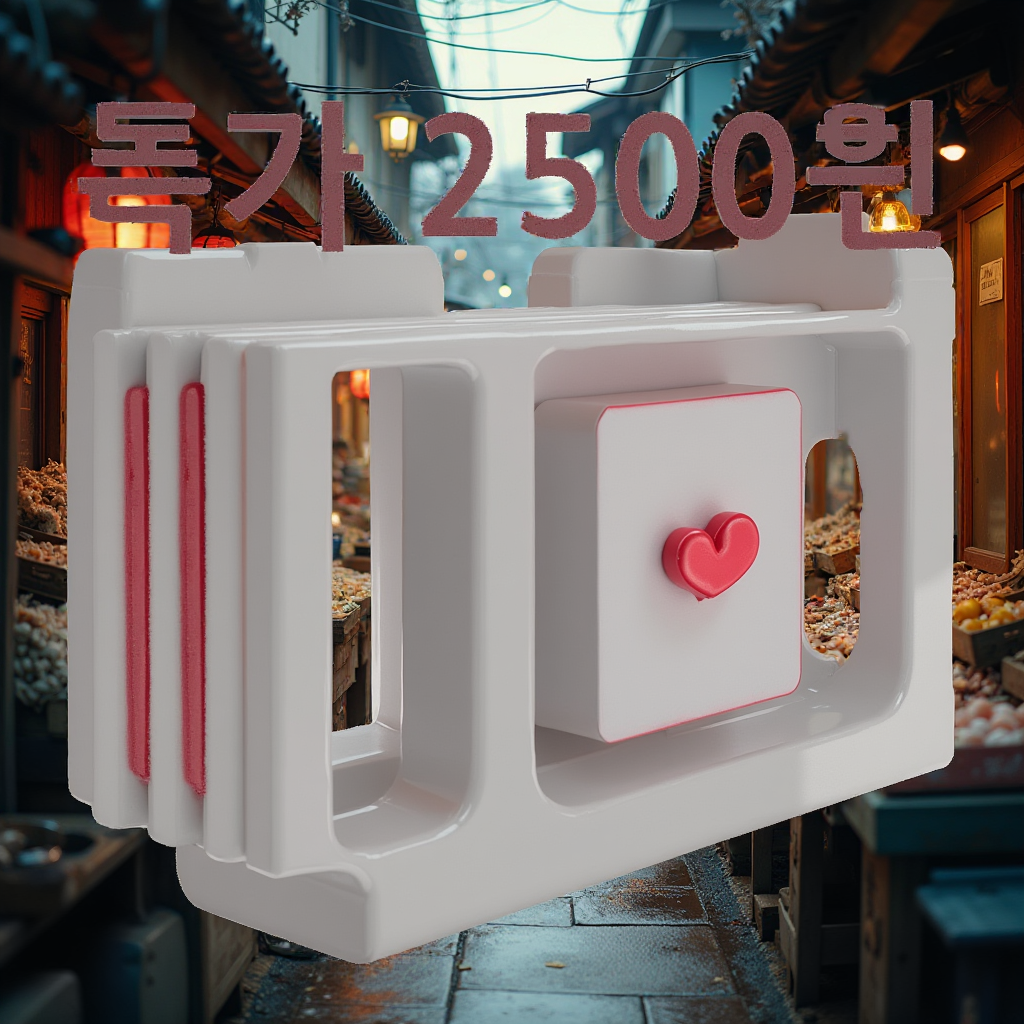

2026-01-07 21:23:14 D [ipykernel_launcher:64] - 이미지를 출력했습니다.


In [8]:
# 셀 3: job_id로 완료된 이미지 가져와서 표시
async def display_completed_ad(job_id: str):
    """
    job_id를 사용하여 완료된 광고 이미지를 가져와서 표시합니다.
    
    Args:
        job_id: 광고 생성 작업 ID
    """
    if not job_id:
        logger.debug("❌ job_id가 없습니다. 먼저 첫 번째 셀을 실행하세요.")
        return
    
    logger.debug("=" * 60)
    logger.debug(f"3단계: 완료된 이미지 가져오기 (job_id: {job_id})")
    logger.debug("=" * 60)
    
    # 저장 경로
    output_path = Path.cwd() / "nogari_ad_3step.png"
    
    # MCP 연결 확인
    if 'adapter' not in globals() or adapter is None:
        logger.debug("❌ adapter가 없습니다. 셀 9번을 먼저 실행하세요.")
        return
    
    if adapter._mcp_session is None:
        logger.debug("⚠️  MCP 재연결 중...\n")
        await adapter.connect_mcp()
        logger.debug("MCP 재연결 완료\n")
    
    try:
        # LLM에게 결과 이미지 가져오기 및 저장 요청
        result_message = f"""
        다음 job_id의 완료된 광고 이미지를 저장해주세요:
        job_id: {job_id}
        
        check_generation_status 도구를 사용하여:
        - job_id: "{job_id}"
        - save_result_path: "{output_path}"
        
        파라미터를 전달하여 결과 이미지를 지정된 경로에 저장하고,
        저장 결과를 알려주세요.
        """
        
        logger.debug(f"완료된 이미지 저장 중... → {output_path}\n")
        
        result_response = await adapter.chat(
            user_message=result_message,
            max_iterations=5
        )
        
        logger.debug(f"LLM 응답:\n{result_response}\n")
        
        # 저장된 이미지 확인 및 표시
        if output_path.exists():
            logger.debug("=" * 60)
            logger.debug("광고 이미지 표시")
            logger.debug("=" * 60)
            logger.debug(f"\n저장 위치: {output_path}\n")
            
            # Jupyter에서 이미지 표시
            try:
                from IPython.display import Image, display
                display(Image(filename=str(output_path)))
                logger.debug("이미지를 출력했습니다.")
            except ImportError:
                logger.debug("(Jupyter 환경이 아니므로 파일을 직접 확인하세요)")
        else:
            logger.debug(f"⚠️  이미지 파일을 찾을 수 없습니다: {output_path}")
            logger.debug("   생성이 완료되지 않았거나 저장 경로가 다를 수 있습니다.")
        
    except Exception as e:
        logger.debug(f"\n❌ 오류: {e}")
        import traceback
        logger.debug(traceback.format_exc())

# 실행 (이전 셀의 job_id 사용)
if 'job_id' in globals() and job_id:
    if 'is_completed' in globals() and is_completed:
        await display_completed_ad(job_id)
    else:
        logger.debug("⚠️  생성이 완료되지 않았습니다. 먼저 이전 셀을 실행하여 완료를 확인하세요.")
else:
    logger.debug("❌ job_id가 없습니다. 먼저 첫 번째 셀을 실행하세요.")